==========================================3b result=================================================
[0. 0.]
[[ 8.57675164e-01  7.29146200e-01  1.26597411e-01  1.27821507e-02
   1.27833914e-03  1.27834038e-04]
 [-8.57675164e-01 -7.29146200e-01 -1.26597411e-01 -1.27821507e-02
  -1.27833914e-03 -1.27834038e-04]]
[[1.21293585e+00 1.03116844e+00 1.79035775e-01 1.80766909e-02
  1.80784455e-03 1.80784631e-04]]


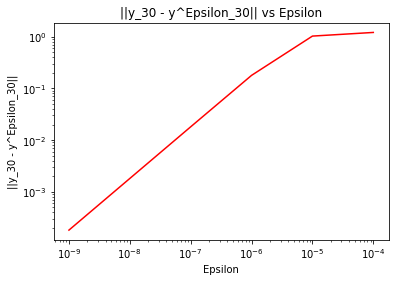

==========================================3c result=================================================
[ 0.85855964 -0.85855964]
[[ 0.85855964  0.85855964  0.85855964  0.85855964  0.85855964  0.85855964]
 [-0.85855964 -0.85855964 -0.85855964 -0.85855964 -0.85855964 -0.85855964]]
[[1.56224200e-13 1.55439153e-14 1.57009246e-15 1.57009246e-16
  0.00000000e+00 0.00000000e+00]]


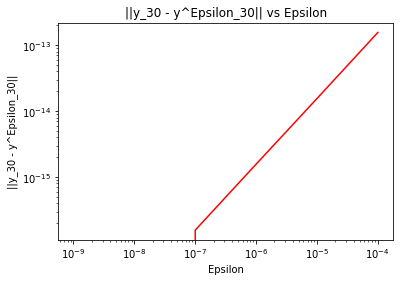

==========================================3extra result=================================================
[0. 0.]
[[-1.86264514e-13 -1.86264515e-14 -1.86264515e-15 -1.86264515e-16
  -1.86264515e-17 -1.86264515e-18]
 [-1.86264514e-13 -1.86264515e-14 -1.86264515e-15 -1.86264515e-16
  -1.86264515e-17 -1.86264515e-18]]
[[2.63417802e-13 2.63417803e-14 2.63417803e-15 2.63417803e-16
  2.63417803e-17 2.63417803e-18]]


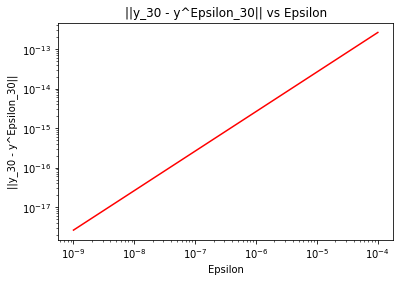

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# matrices initializing
A = np.array([[1,0],[0,1]])
B = np.array([[1,0],[0,1]])
R = np.array([[1/2, -1],[-1, 1/2]])

H = np.zeros((2,31))
H[:,0] = [0, 0]
X_1 = np.array([[0,0]]).reshape(2,)
X_2 = np.array([[2,1]]).reshape(2,)
epsilon = np.zeros((1,6))
epsilon[0,:] = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
X_pert1 = np.zeros((2,6))
Y_pert1 = np.zeros((2,6))
X_pert2 = np.zeros((2,6))
Y_pert2 = np.zeros((2,6))
X_pert3 = np.zeros((2,6))
Y_pert3 = np.zeros((2,6))
err1 = np.zeros((1,6))
err2 = np.zeros((1,6))
err3 = np.zeros((1,6))

def Y(x,H,A,B,R):
    for i in range(1,30):
        H[:,1] = list(map(lambda x: np.tanh(x), np.matmul(A,x)))
        H[:,i+1] = list(map(lambda x: np.tanh(x), np.matmul(R,H[:,i])))
    return np.dot(B,H[:,30])
Y1 = Y(X_1,H,A,B,R)
Y2 = Y(X_2,H,A,B,R)

for k in range(6):
    X_pert1[:,k] = [epsilon[0][k], -epsilon[0][k]]
    Y_pert1[:,k] = Y(X_pert1[:,k],H,A,B,R)
    X_pert2[:,k] = [2+epsilon[0][k], 1-epsilon[0][k]]
    Y_pert2[:,k] = Y(X_pert2[:,k],H,A,B,R)
    X_pert3[:,k] = [epsilon[0][k], epsilon[0][k]]
    Y_pert3[:,k] = Y(X_pert3[:,k],H,A,B,R)

# error calcultion 
for k in range(6):
    err1[0][k] = np.linalg.norm(Y1 - Y_pert1[:,k])
    err2[0][k] = np.linalg.norm(Y2 - Y_pert2[:,k])
    err3[0][k] = np.linalg.norm(Y1 - Y_pert3[:,k])

print("==========================================3b result=================================================")

#output - 3b
print(Y1)
print(Y_pert1)
print(err1)

#Plot in log-log scale - 3b
plt.figure(1); plt.clf()
plt.loglog(epsilon[0,:], err1[0,:],c = 'red')
plt.xlabel('Epsilon')
plt.ylabel('||y_30 - y^Epsilon_30||')
plt.title('||y_30 - y^Epsilon_30|| vs Epsilon')
plt.show()

print("==========================================3c result=================================================")

#output - 3c
print(Y2)
print(Y_pert2)
print(err2)

#Plot in log-log scale - 3c
plt.figure(2); plt.clf()
plt.loglog(epsilon[0,:], err2[0,:],c = 'red')
plt.xlabel('Epsilon')
plt.ylabel('||y_30 - y^Epsilon_30||')
plt.title('||y_30 - y^Epsilon_30|| vs Epsilon')
plt.show()

print("==========================================3extra result=================================================")

#output - 3b
print(Y1)
print(Y_pert3)
print(err3)

#Plot in log-log scale - 3b
plt.figure(1); plt.clf()
plt.loglog(epsilon[0,:], err3[0,:],c = 'red')
plt.xlabel('Epsilon')
plt.ylabel('||y_30 - y^Epsilon_30||')
plt.title('||y_30 - y^Epsilon_30|| vs Epsilon')
plt.show()